# Reading Data

In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm

from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('fifa_eda.csv')
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     17955 non-null  float64
 8   Wage                      18207 non-null  float64
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Skill Moves               18159 non-null  float64
 12  Position                  18207 non-null  object 
 13  Joined                    18207 non-null  int64  
 14  Contra

In [4]:
null_data = df[df.isnull().any(axis=1)]
null_data.count()

ID                          300
Name                        300
Age                         300
Nationality                 300
Overall                     300
Potential                   300
Club                         59
Value                        48
Wage                        300
Preferred Foot              300
International Reputation    252
Skill Moves                 252
Position                    300
Joined                      300
Contract Valid Until         11
Height                      300
Weight                      300
Release Clause              300
dtype: int64

In [5]:
new_df = df
new_df.shape

(18207, 18)

In [6]:
new_df.dropna(inplace=True, axis = 0)

In [7]:
new_df.shape

(17907, 18)

# Datetime conversion

In [8]:
Con = "Contract Valid Until"
new_df[Con] = pd.to_datetime(new_df[Con], errors='coerce')
new_df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


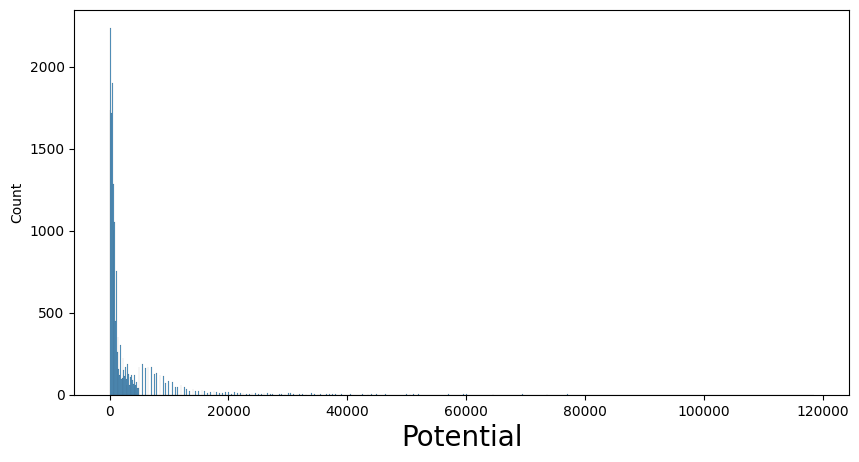

In [9]:
plt.figure(figsize=(10,5))
sns.histplot(x=new_df['Value']) 
plt.xlabel("Potential",fontsize=20)
plt.show()

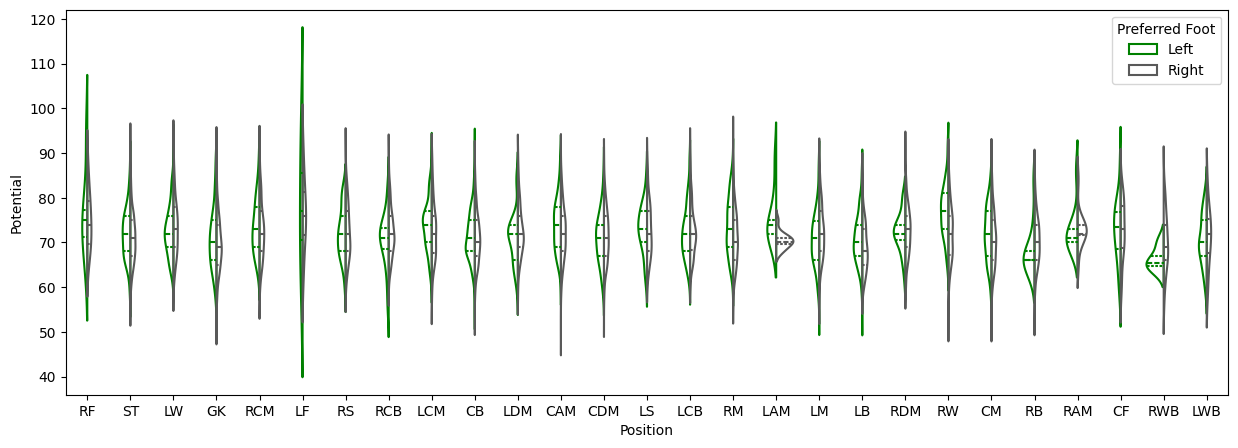

In [10]:
plt.figure(figsize=(15,5))
sns.violinplot(data=df, x="Position", y="Potential", hue="Preferred Foot",
               split=True, inner="quart", fill=False,
               palette={"Left": "g", "Right": ".35"})
plt.show()

# Feature Engineering

In [12]:
le = preprocessing.LabelEncoder()

In [13]:
new = new_df

In [14]:
new.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [15]:
new['Year'] = new[Con].dt.year
new['Month'] = new[Con].dt.month
new['Date'] = new[Con].dt.day

In [16]:
new['Club'] = le.fit_transform(new['Club'])
new['Preferred Foot'] = le.fit_transform(new['Preferred Foot'])
new['Position'] = le.fit_transform(new['Position'])
new['Nationality'] = le.fit_transform(new['Nationality'])
new['Name'] = le.fit_transform(new['Name'])
new = new.drop(Con, axis = 1)
new.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Height,Weight,Release Clause,Year,Month,Date
0,158023,9461,31,6,94,94,212,110500.0,565.0,0,5.0,4.0,21,2004,5.583333,159.0,226500.0,2021,1,1
1,20801,3089,33,122,94,94,326,77000.0,405.0,1,5.0,5.0,26,2018,6.166667,183.0,127100.0,2022,1,1
2,190871,12300,26,20,92,93,435,118500.0,290.0,1,5.0,5.0,14,2017,5.750000,150.0,228100.0,2022,1,1
3,193080,4058,27,138,91,93,375,72000.0,260.0,1,4.0,1.0,5,2011,6.333333,168.0,138600.0,2020,1,1
4,192985,8468,27,13,91,92,374,102000.0,355.0,1,4.0,4.0,19,2015,5.916667,154.0,196400.0,2023,1,1


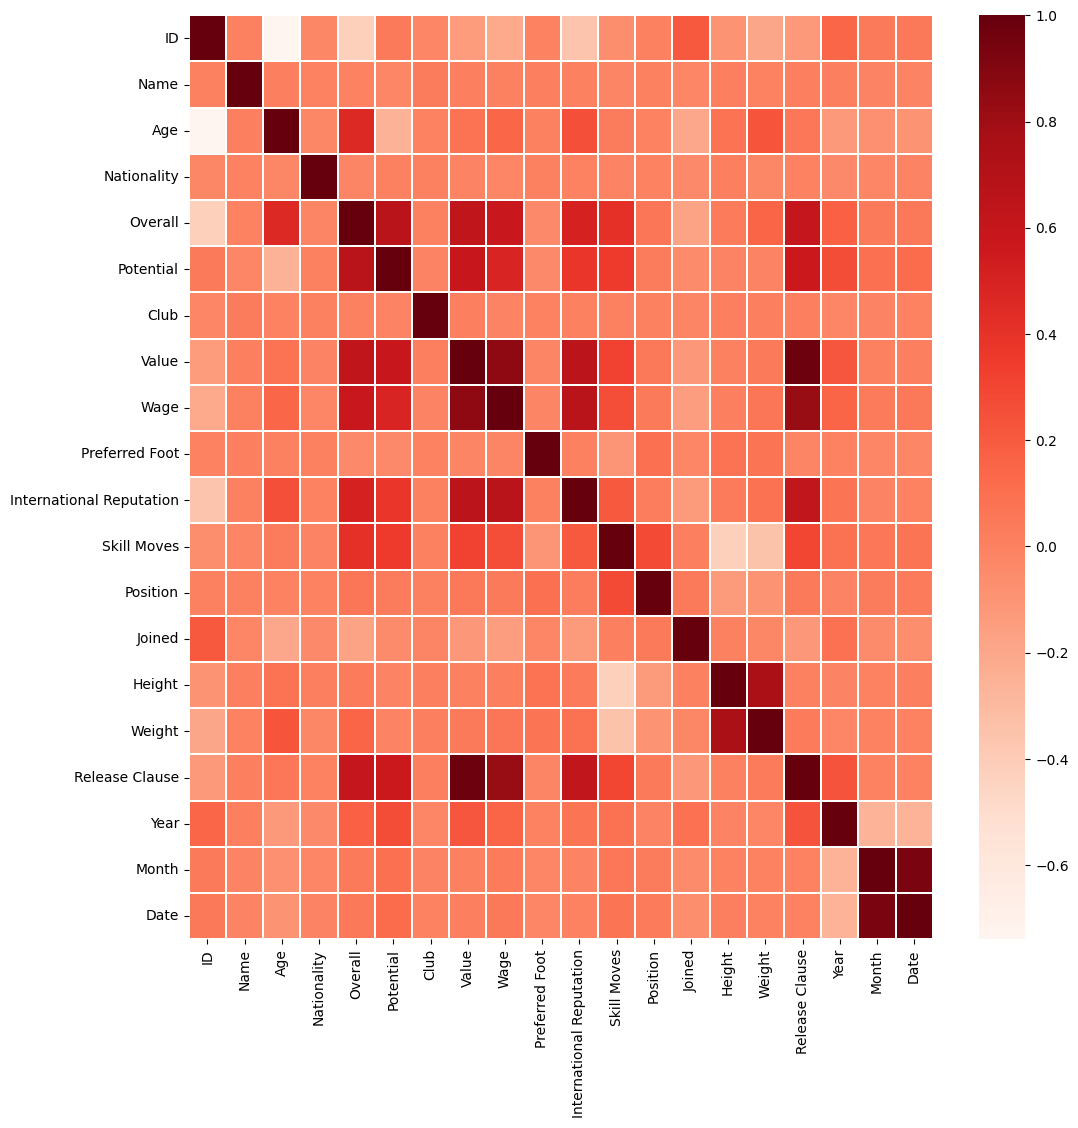

In [17]:
cor = new.corr(numeric_only = True)
plt.figure(figsize = (12,12))
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, linewidths=.1,cmap="Reds")
plt.show()

In [18]:
target = "Overall"
feature_corr = new_df.corr(method ='pearson') [target]

feature_corr = feature_corr.sort_values(ascending = False)
print(feature_corr[0:])

Overall                     1.000000
Potential                   0.660409
Value                       0.631673
Release Clause              0.601252
Wage                        0.576098
International Reputation    0.501429
Age                         0.456619
Skill Moves                 0.415412
Contract Valid Until        0.183629
Year                        0.174333
Weight                      0.154625
Position                    0.067554
Date                        0.051446
Month                       0.044019
Height                      0.038778
Club                        0.001449
Name                       -0.000522
Nationality                -0.014733
Preferred Foot             -0.043753
Joined                     -0.170924
ID                         -0.421406
Name: Overall, dtype: float64


# Feature Selection

In [19]:
new = new.drop(['Name','Nationality', 'ID', 'Joined','Preferred Foot', 
                'Height','Month', 'Date','Club','Weight','Position'], axis = 1)
new.head()

,Age,Overall,Potential,Value,Wage,International Reputation,Skill Moves,Release Clause,Year
0,31,94,94,110500.0,565.0,5.0,4.0,226500.0,2021
1,33,94,94,77000.0,405.0,5.0,5.0,127100.0,2022
2,26,92,93,118500.0,290.0,5.0,5.0,228100.0,2022
3,27,91,93,72000.0,260.0,4.0,1.0,138600.0,2020
4,27,91,92,102000.0,355.0,4.0,4.0,196400.0,2023


Outlier

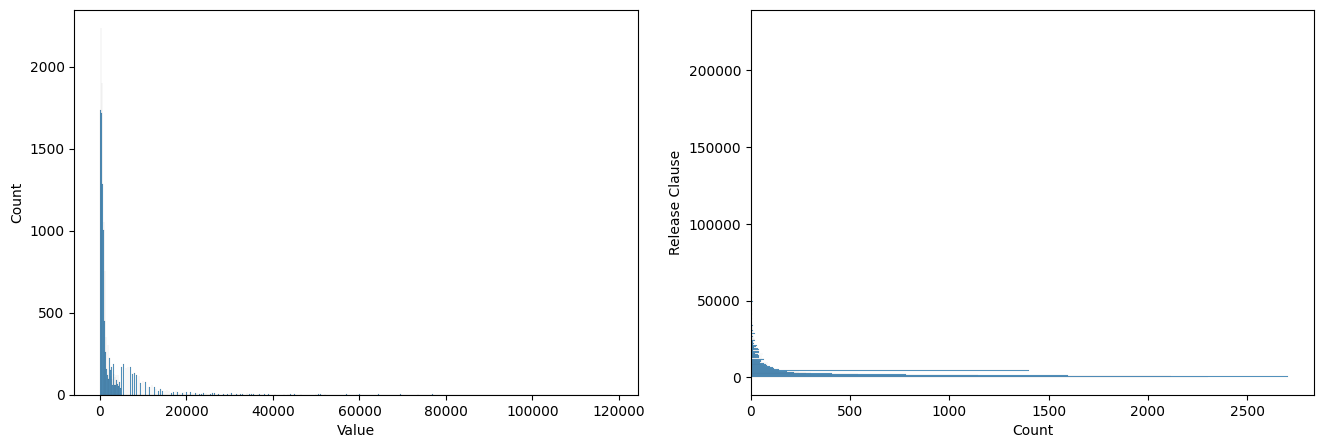

In [20]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(x=new['Value'])
plt.subplot(1,2,2)
sns.histplot(y=new['Release Clause'])
plt.show()

In [21]:
new['Value'].describe()

count     17907.000000
mean       2450.132909
std        5633.206685
min          10.000000
25%         325.000000
50%         700.000000
75%        2100.000000
max      118500.000000
Name: Value, dtype: float64

In [22]:
features = ["Value", "Release Clause", "Potential"]

for cur in features:
    q1 = new[cur].quantile(0.25)
    q3 = new[cur].quantile(0.75)
    iqr = q3 - q1
    high = q3 + 1.5 * iqr
    low = q1 - 1.5 * iqr
    print("Highest allowed for", cur, " is:", high)
    print("Lowest allowed for", cur, " is:", low)
    new = new[( new[cur] > low ) & (new[cur] < high)]

Highest allowed for Value  is: 4762.5
Lowest allowed for Value  is: -2337.5
Highest allowed for Release Clause  is: 5515.0
Lowest allowed for Release Clause  is: -2525.0
Highest allowed for Potential  is: 83.5
Lowest allowed for Potential  is: 55.5


In [23]:
new['Value'].describe()

count    14460.000000
mean       761.579530
std        726.639969
min         10.000000
25%        260.000000
50%        525.000000
75%        950.000000
max       4700.000000
Name: Value, dtype: float64

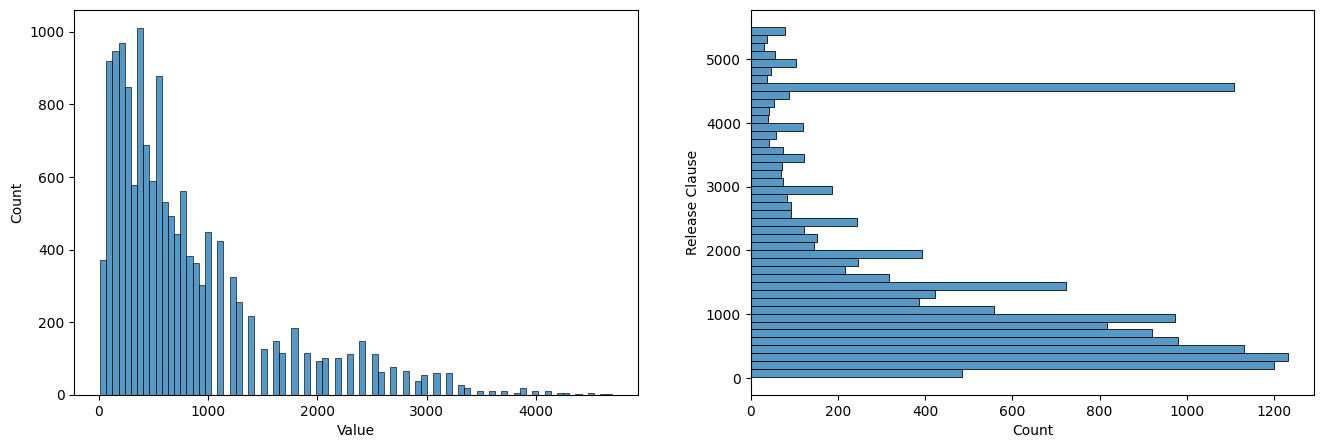

In [24]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(x=new['Value'])
plt.subplot(1,2,2)
sns.histplot(y=new['Release Clause'])
plt.show()

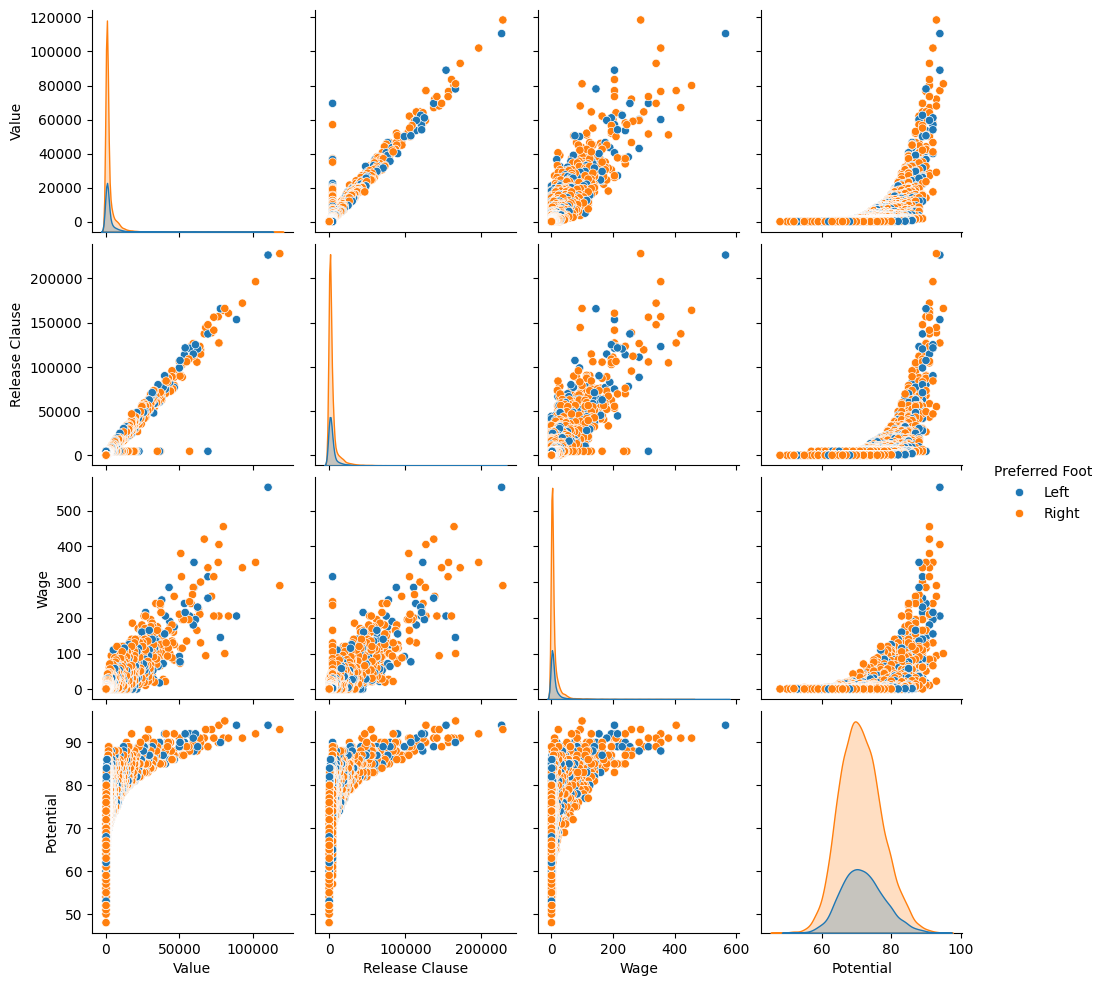

In [135]:
sns.pairplot(df, hue="Preferred Foot", vars=["Value", "Release Clause", "Wage", "Potential"])

Dividing Data

In [25]:
target = "Overall"
y = new[target]

X = new.drop(columns = [target], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape)

(10122, 8) (10122,)


# Training

In [30]:
res = pd.DataFrame({'Algo' : [], 'MSE' : [], 'R2' : []})

Linear Regression

In [31]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

res.loc[len(res.index)] = ['Linear Reg', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)] 

MSE: 4.114785577773563
RMSE: 2.028493425617535
MAE: 1.6201465723698285
R2 Score: 0.8534617116626639


In [32]:
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=True)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

lr.fit(X_train_trans, y_train)
y_pred = lr.predict(X_test_trans)

print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

res.loc[len(res.index)] = ['Poly Reg', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)] 

MSE: 1.2987031495491863
RMSE: 1.1396065766523051
MAE: 0.8302735364038785
R2 Score: 0.9537497803965235


K Neighbours Regressor

Text(0, 0.5, 'R2 Score')

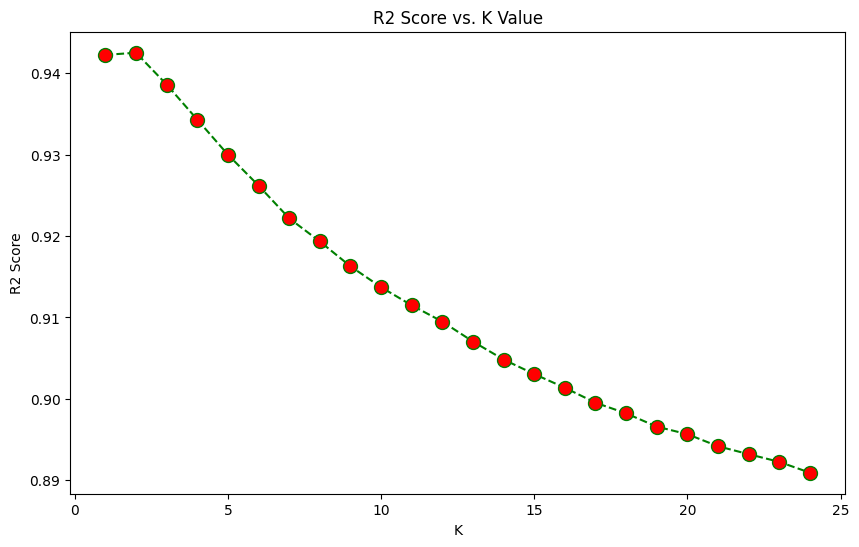

In [33]:
error_rate = []
for i in range(1, 25):  
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(r2_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,len(error_rate)+1),error_rate,color='green', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('R2 Score vs. K Value')
plt.xlabel('K')
plt.ylabel('R2 Score')

In [34]:
knn = KNeighborsRegressor(n_neighbors = 2)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

res.loc[len(res.index)] = ['KNeighbors', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)] 

MSE: 1.6146841862609498
RMSE: 1.2707022413850342
MAE: 0.7833102812355924
R2 Score: 0.9424968683330345


Adaboost

Text(0, 0.5, 'R2 Score')

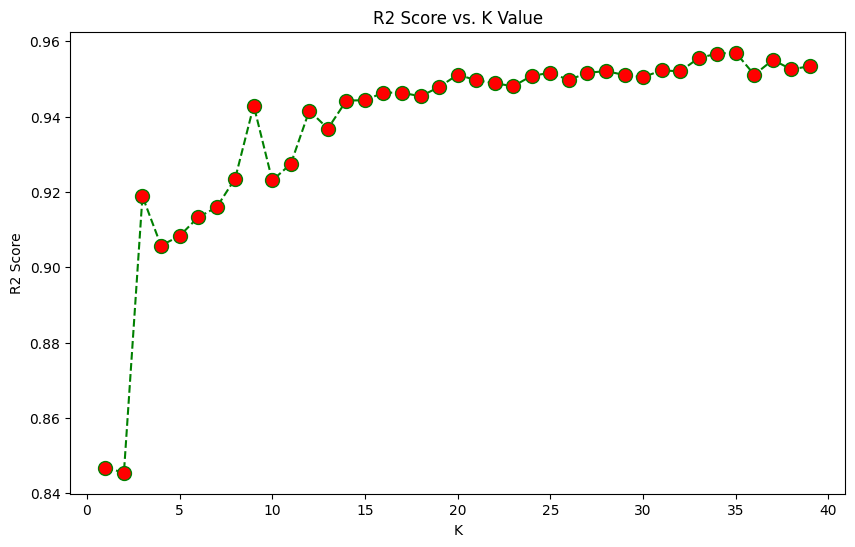

In [35]:
error_rate = []
for i in range(1, 40):  
    ada = AdaBoostRegressor(n_estimators=i)
    ada.fit(X_train,y_train)
    pred_i = ada.predict(X_test)
    error_rate.append(r2_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,len(error_rate)+1),error_rate,color='green', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('R2 Score vs. K Value')
plt.xlabel('K')
plt.ylabel('R2 Score')

In [36]:
ada = AdaBoostRegressor(n_estimators=10)
ada.fit(X_train,y_train)
y_pred = ada.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

res.loc[len(res.index)] = ['Adaboost', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)] 

MSE: 1.7640742672456309
RMSE: 1.3281845757445125
MAE: 1.0557459686331068
R2 Score: 0.9371766963949584


SVM

In [37]:
s = svm.SVR()
s.fit(X_train,y_train)
y_pred = s.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

res.loc[len(res.index)] = ['SVM', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)] 

MSE: 6.191804140727567
RMSE: 2.488333607201327
MAE: 1.700236313955474
R2 Score: 0.7794936422924883


Decision Tree

In [38]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred = s.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

res.loc[len(res.index)] = ['Decision Tree', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)] 

MSE: 6.191804140727567
RMSE: 2.488333607201327
MAE: 1.700236313955474
R2 Score: 0.7794936422924883


In [39]:
res

,Algo,MSE,R2
0,Linear Reg,4.114786,0.853462
1,Poly Reg,1.298703,0.953750
2,KNeighbors,1.614684,0.942497
3,Adaboost,1.764074,0.937177
4,SVM,6.191804,0.779494
5,Decision Tree,6.191804,0.779494
